# Machine learning su aplicación en Biología

__Análisis de datos biológicos utilizando métodos de machine learning__

_MeIA_

`2023`

A través de la historia moderna, los humanos usamos maquinas para reducir el esfuerzo e incrementar la eficiencia al hacer los trabajos, y Machine learning es una extensión de esto.

En Biología, Machine learning se ha aplicado para predicción de estructura de proteínas, reconocimiento de imagenes, desarrollo de fármacos, interacción proteína-proteína, encontrar SNPs (Single nucleotide polymorphism) en secuencias genómicas, detección de cancer, problemas de biología de sistemas, minería de textos biológicos, etc.

### Tipos de algoritmos de machine learning

- Aprendizaje supervisado: es cuando nuestro modelos se encuentra en un conjunto de datos pre-etiquetado y desarrolla sistemas para predecir los resultados de los datos imprevistos.

- Aprendizaje no supervisado: este es usado para grupar o inferir patrones, tendencias o relaciones dentro del conjunto de datos, sin ninguna referencia o conocimiento previo sobre los datos etiquetados.

Otros tipos de Machine learning

- Aprendizaje semisupervisado: este enfoque se utiliza cuando tenemos un conjunto de datos pequeño de datos etiquetados conocidos y datos desconocidos masivos. Estos modelos aprovechan inicialmente la oportunidad de estudiar algunas tendencias de las etiquetas conocidas y luego intentan descubrir otros patrones ocultos de los datos no etiquetados.

- Aprendizaje por refuerzo: en este enfoque, un agente interactúa con el entorno que lo rodea mediante las acciones para alcanzar un objetivo definido por el usuario y se entrena mediante un método de recompensa o castigo.

### Evaluación

Exactitud (Accuracy): es la tasa de predicción correcta para un modelo o el número de valores predichos correctamente dividido por el número total de instancias en el conjunto de prueba.

Precisión (Precesion): La precisión es la proporción de verdaderos positivos y el número total de instancias predichas como positivas por el modelo.

Recall (Exhausitividad): es la tasa de verdaderos positivos y también se denomina sensibilidad de un modelo o el número de verdaderos positivos dividido por el número total de instancias positivas en el conjunto de datos de prueba.

F1 score: La precisión y el recall siempre se mencionan juntas, como la precisión en un nivel de recuperación, o se miden en un único valor matemático denominado puntuación F1. Esta es la media armónica de precisión y recall.

Receiver Operating Characteristics (ROC) Curve: La curva ROC es otro método para la evaluación de los clasificadores. Es un gráfico entre la tasa de verdaderos positivos (TPR) o la sensibilidad y la tasa de falsos positivos (FPR) (1-Especificidad). La curva sólida es el cambio de la tasa de verdaderos positivos con la tasa de falsos positivos. Cuanto mayor sea el área bajo la curva, mayor será la precisión del modelo.

Cross-validation: es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba. Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones.

# Algoritmos Supervisados

## Regresión lineal

La regresión es un algoritmo de aprendizaje supervisado que es usado para predecir las variables continuas, como edad, precio de un producto, salarios, predicciones meteorológicas, etc.

La regresión lineal es representada por una ecuación lineal en la que una variable es independiente (x) y la segunda es la variable dependiente (y).

Si los valores de entrada y salida estan relacionados linealmente, estonces se puede dibujar una línea con los puntos de datos, la ec. que describe esto es:

$y = mx + b$

Donde: x es la variable independiente, y la variable dependiente, m la pendiente y b es el intercepto en y.

<img src="../imagenes/regresionlinea.png" width="300" height="300"/>

La tarea de la regresión lineal es encontrar los valores óptimos de $m$ y $b$ en función de los puntos de datos $x$ e $y$ para que la distancia promedio entre los puntos y la línea sea mínima. Para una línea, la distancia entre los puntos y las líneas se denominan errores, y cada punto tiene su propio error. Cuando estos errores se elevan al cuadrado y se suman, el valor obtenido se denomina error cuadrático medio. Este error cuadrático medio es el error acumulativo entre todos los puntos de datos y la línea. 

<img src="../imagenes/bestfit.png" width="400" height="400"/>

Puede haber muchos valores para $m$ y $b$ (a), la regresión encuentra la línea óptima iterativamente ajustando varias líneas y luego seleccionando la línea que tiene el mínimo error cuadrático medio (b).

Cuando tenemos conjuntos de variables se sigue el mismo procedimiento para un problema de dos variables, este problema se denomina regresión lineal multivariable.

Cuando la entrada tiene más de dos variables o tienen dimensiones mayores, entonces la línea de regresión es un plano para tres dimensione o un hiperplano para más de tres dimensiones donde la ec. será:

$y =  m_1x_1 + m_2x_2 + m_3x_3 + m_4x_4 + ... + m_nx_n + b$

donde $x_1,x_2,x_3,x_4,...,x_n$ son variables independientes o caracteristicas. $m_1,m_2,m_3,m_4,...,m_n$ son los coeficientes respectivos de las características y estos dan un idea sobre la proporción de las características para el cálculo de 'y'. Por último 'b' es un término de sesgo.


Utilizaremos un dataset de Diabetes que contiene diez variables independientes, como edad, sexo, BMI, presión arterial, y seis medidas de suero sanguíneo (es decir células T), lipoproteínas de baja densidad, lipoproteínas de alta densidad, hormonas estimulantes de la tiroides, prescripción de lamotrigina y azúcar en sangre de 442 pacientes (Efron et al., 2004). 

La variables dependiente es una medida cuantitativa de la progresión de la enfermedad en un año después del inicio. Los datos están disponibles públicamente en https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html, 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importamos el dataset
dataset = pd.read_csv('../Datos/diabetes.txt',delimiter='\t')
dataset.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
# Utilizaremos el metodo 'describe()' 
# para ver un conjunto de estadisticas simples de los datos
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
SEX,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
BMI,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
BP,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
S1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
S2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
S3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
S4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
S5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
S6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


Podemos observar que la variable independiente tiene un media de 152.13 y una desviación estándar de 77.09.

Por lo tanto, un modelo entrenado que tenga un error cuadrático medio inferior a 77.09 estará por encima de la línea base. 

In [4]:
# Separaremos las características y las etiquetas.
# Las etiquetas son valores continuos, 
# ya que es un problema de regresión
X=dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

# X contiene todas las columnas con excepción de Y.
# y contiene la variable dependiente.

### Importamos los métodos de Scikit-Learn

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### División de prueba de entrenamiento

Utilizaremos el módulo llamado “train_test_split()”, el cual tendra las características, etiquetas y proporción de división, donde hemos pasado $X$,$y$, y $0.02$, respectivamente. Mientras que random_state permite mantener constante la aleatoriedad y obtendremos la misma división cada vez con un valor de estado aleatorio. 


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=110)

Con estas cuatro variables podemos realizar el modelos de regresión

#### Modelo de entrenamiento

In [7]:
#Instaciamos la clase LinerarRegression como regressor  
regressor = LinearRegression()  

#El método fit() entrenará el modelo utilizando los datos
#proporcionados. 
regressor.fit(X_train, y_train)

LinearRegression()

#### Evaluación del modelo

Utilizaremos el métodos 'predict()' que nos permite predecir valores en función de las funciones proporcionadas. Utilizaremos este método para pronosticar valores en función de los datos de 'X_text' y compararlos con las etiquetas 'y_text'

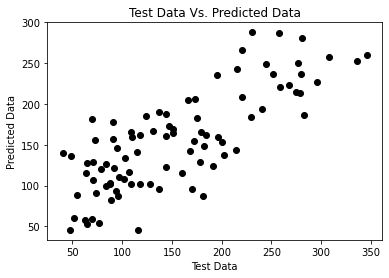

In [8]:
predictions=regressor.predict(X_test)
plt.scatter(y_test, predictions,color='k')
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')
plt.title('Test Data Vs. Predicted Data')
plt.show()

Trazamos los valores predichos y los valores originales utilizando el método de dispersión de Matplotlib. Para un modelos que tiene un error cero, obtendremos una línea diagonal, mientras que, en el gráfico generado en la figura anterior, los valores se distribuyen alrededor de la diagonal pero presentan una tendencia hacia la diagonal. 

La evaluación visual de este modelo no proporciona información exacta sobre los errores del modelo. 

En este caso, utilizaremos medidas cuantitativas. Cuantitativamente, los errores son las diferencias entre los valores predichos y los valores originales. 

Una medida estándar de los errores es la media o promedio de todas esas discrepancias. Al evaluar modelos que predicen valores continuos, se utilizan tres tipos de valores cuantitativos: el error absoluto medio o el error de suma promedio, el error cuadrático medio y el error cuadrático medio. 

Estos errores los calcularemos utilizando sklearn.

In [9]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 39.22466065716572
Mean Squared Error: 2228.0908310594614
Root Mean Squared Error: 47.20265703389441


Las ecuaciones contienen la intersección y los coeficientes para cada característica. Estos coeficientes pueden darnos una idea sobre la importancia de varias características. Podemos recuperar el intercepto y el coeficiente usando los objetos modelo “.intercept_” y “.coef_”.

In [10]:
# Para recuperar el intercepto
print(regressor.intercept_)
# Para recuperar la pendiente
print(regressor.coef_)

-307.5710454650565
[ 1.40608997e-01 -2.56128390e+01  5.08771783e+00  1.19293496e+00
 -1.08819176e+00  8.03227722e-01  4.24108443e-02  4.53744471e+00
  6.51304992e+01  3.71060693e-01]


El código anterior imprime el intercepto y el coeficiente del modelo entrenado. Mapeamos estos con las características.

In [11]:
coeff_df = pd.DataFrame(regressor.coef_.T, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
AGE,0.140609
SEX,-25.612839
BMI,5.087718
BP,1.192935
S1,-1.088192
S2,0.803228
S3,0.042411
S4,4.537445
S5,65.130499
S6,0.371061


La característica S5 tiene el coeficiente de altura (es decir, 65.13). Esto puede interpretarse como que la prescripción del fármaco lamotrigina puede aumentar el riesgo de progresión de la enfermedad en unas 65 veces si el resto de características son valores unitarios.

In [12]:
print('R Squared:', metrics.r2_score(y_test, predictions)) 

R Squared: 0.6192854503707959


#### Predicción de la altura del niño en función de la altura de los padres

Utilizaremos los datos de altura de Galton (Galton,2017,1886) en los que Francis Galton registró las alturas de padres y sus hijos e introdujo el concepto de regresión.

In [13]:
dataset = pd.read_csv('../Datos/Galton.txt',delimiter='\t')
dataset.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


El dataset consiste de cinco columnas, El identificador de la familia, la altura del padre, la altura de la madre y el genero y la altura del niño y finalmente el número de hermanos.

El dataset tiene 898 observaciones.

In [14]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Father,898.0,69.232851,2.470256,62.0,68.0,69.0,71.0,78.5
Mother,898.0,64.084410,2.307025,58.0,63.0,64.0,65.5,70.5
Height,898.0,66.760690,3.582918,56.0,64.0,66.5,69.7,79.0
Kids,898.0,6.135857,2.685156,1.0,4.0,6.0,8.0,15.0


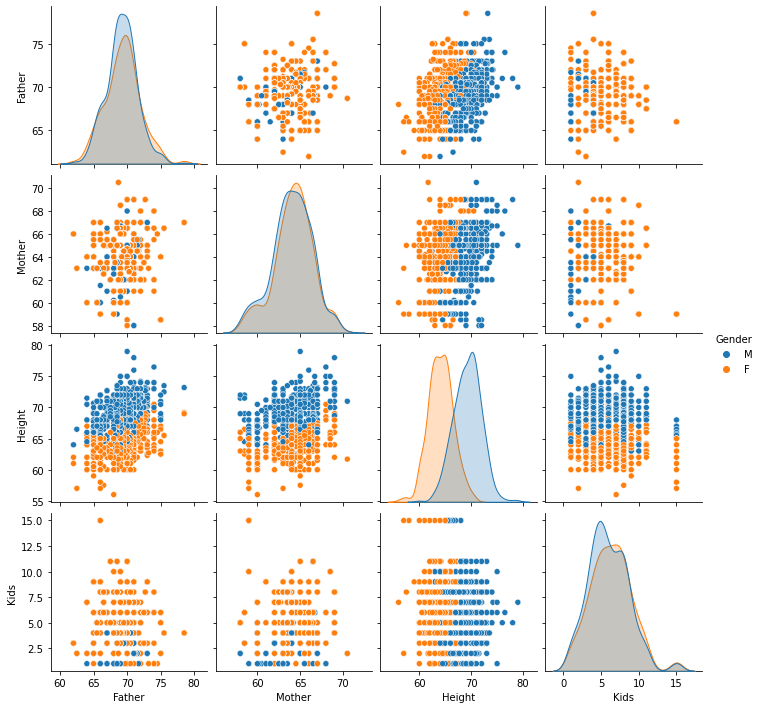

In [15]:
#Podemos realizar una inspección visual de los datos, 
# utilizando Seaborn's.
sns.pairplot(dataset, hue='Gender')

Podemos observar que la distribución de características, segun el género, es sorprendentemente diferente.

Por lo que nos conviene construir dos modelos: uno para predecir la altura de los niños y otro para predecir la altura de las niñas. Para esto dividiremos nuesto dataset por género.

Podemos observar que el dataset de "boys" contiene 465 observaciones y el de "girls" 433 observaciones.

In [16]:
boys = dataset[dataset['Gender']=='M']
boys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 894
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  465 non-null    object 
 1   Father  465 non-null    float64
 2   Mother  465 non-null    float64
 3   Gender  465 non-null    object 
 4   Height  465 non-null    float64
 5   Kids    465 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 25.4+ KB


In [17]:
girls = dataset[dataset['Gender']=='F']
girls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 1 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  433 non-null    object 
 1   Father  433 non-null    float64
 2   Mother  433 non-null    float64
 3   Gender  433 non-null    object 
 4   Height  433 non-null    float64
 5   Kids    433 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 23.7+ KB


#### Predicción de la altura de los hijos

In [18]:
X=boys[['Father','Mother']] # Variable independiente
y=boys[['Height']] #Variable dependiente o etiquetas

In [19]:
# Ahora dividimos los datos en conjuntos de datos de prueba 
# y entrenamiento
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=110)

In [20]:
# Ahora realizaremos el entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predicción 
predictions=regressor.predict(X_test)

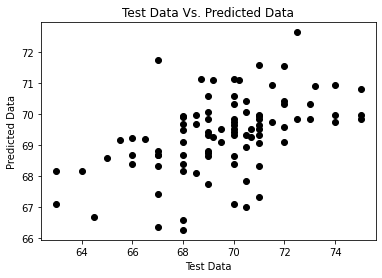

In [22]:
plt.scatter(y_test, predictions,color='k')
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')
plt.title('Test Data Vs. Predicted Data')
plt.show()

In [23]:
#Una vez que el modelo esté entrenado, recuperamos 
#el intercepto y el coeficiente del modelo
print(regressor.intercept_)
coeff_df = pd.DataFrame(regressor.coef_.T, X.columns, columns=['Coefficient'])
print(coeff_df)

[19.69844015]
        Coefficient
Father     0.421263
Mother     0.317899


De acuerdo con el itercepto y el coeficiente, ahora podemos calcular una ecuación estimada para el cálculo de la altura de un niño en función de la altura de sus padres:

$Altura\_niños=19.69+(0.42*Altura\_padre)+(0.31*Altura\_madre)$



In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R Squared:', metrics.r2_score(y_test, predictions)) 

Mean Absolute Error: 1.7284131207951459
Mean Squared Error: 4.724556054413049
Root Mean Squared Error: 2.1736043923430612
R Squared: 0.2364381317355062


Podemos observar que el error cuadrático medio de la raíz es 2.17; por lo tanto nuesto modelo tiene un error de +- 2.17 pulgadas.

Ahora supongamos que tenermos nuevos datos, y realizaremos la predicción.

In [25]:
father_height=70
mother_height=65
son_height=regressor.predict(np.array([[father_height,mother_height]]))
print(son_height)

[[69.85026337]]


/Users/galanve/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Utilizamos el metodo .predict(), pasamos los valores como matrices anidadas, y esto se debe a que el método de predicción toma una matriz o una lista de filas para predecir los resultados

#### Ahora predice la altura de las hijas

In [26]:
#Función para ocultar una parte del codigo
def toggle_cell_code(button_id):
    from IPython.display import display_html
    my_html = '''
    <button type="button" id="%s" onclick="code_toggle('%s')">Codigo</button>
    <script>
    function code_toggle(my_id) {
        // get the parent element for the cell code and output
        var p = $("#"+my_id);
        if (p.length==0) return;
        while (!p.hasClass("cell")) {
            p = p.parent();
            if (p.prop("tagName") =="body") return;
        }
    // get the cell code and toggle its value
    var cell_code = p.find(".input");
    cell_code.toggle();
    }
    </script>
    ''' %(button_id, button_id)
    return display_html(my_html, raw=True)

Codigo

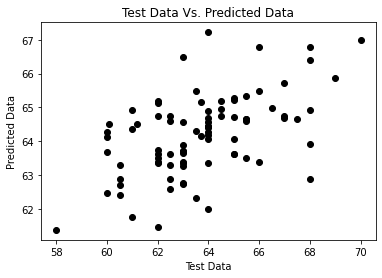

In [27]:
toggle_cell_code("Display")

X = girls[['Father','Mother']]
y = girls[['Height']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
predictions=regressor.predict(X_test)
plt.scatter(y_test, predictions,color='k')
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')
plt.title('Test Data Vs. Predicted Data')
plt.show()

In [28]:
toggle_cell_code("Display1")

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

Codigo

[17.53100477]
[[0.4070717  0.28776276]]


In [29]:
toggle_cell_code("Display2")

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R Squared:', metrics.r2_score(y_test, predictions)) 

Codigo

Mean Absolute Error: 1.5923427908120278
Mean Squared Error: 4.102869748180962
Root Mean Squared Error: 2.025554182978318
R Squared: 0.24038809233007163


## Regresión logistica

La regresión logistica nos permite realizar clasificaciones o predicciones de valores categóricos. Como la clasificación de correos electrónicos spam, predecir si un tumor es benigno o maligno y predecir si una persona tiene una enfermedad o no, entre otros.

En la regresión logistica utilizamos dos valores normalmente $0$ y $1$, por ejemplo en el caso de los tumores podemos definir que $0$ representa tumor benigno y $1$ representa tumor maligno, utilizamos una funsión logística llamada función sigmoidea, en la cual definimos un umbral para seleccionar $0$ y $1$. 

<img src="../imagenes/sigmoid.png" width="400" height="400"/>
Función logística o sigmoidea



Este dataset deriva desde el resultado de pruebas clinicas no invasibas de 303 pacientes sometidos a angiografía en el insituto de cardiología de Budapest, Hungría. "Es una técnica radiográfica que emplea un colorante que se inyecta en las cavidades del corazón o en las arterias coronarias". La angiografía es un procedimiento especial que utiliza rayos X y que obtiene imágenes (angiogramas) de los vasos sanguíneos. https://www.ajconline.org/article/0002-9149(89)90524-9/pdf

Este Dataset consiste de 13 características para 303 pacientes. 


https://archive.ics.uci.edu/

In [30]:
dataset = pd.read_csv('../Datos/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



El dataset contiene las sigueintes características 
- age: Edad de las personas en años
- sex: Sexo
- cp: Dolor torácico
- trestbps: Presión arterial en reposo de la persona
- chol: Colesterol de la persona
- fbs: Azúcar en sangres en ayunas de la persona
- restecg: restecg: Resultados electrocardiográficos en reposo
   - Valor 0: normal
    - Valor 1: tener anomalía en la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV)
    - Valor 2: mostrar hipertrofia ventricular izquierda probable o definitiva
- thalach: La frecuencia cardíaca máxima alcanzada por la persona 
- exang: Angina inducida por el ejercicio
- oldpeak: Depresión ST inducida por el ejercicio en relación con el reposo (ST se relaciona con las posiciones en el gráfico ECG).
- slope: La pendiente del segmento ST del ejercicio máximo (-0 pendiente descendente -1 plano -2 pendiente ascendente)
- ca: Número de vasos principales (0-3)
- thal: Un trastorno de la sangre llamado talasemia. Valor 0 null (eliminado del conjunto de datos previos); 1 defecto fijo (falta de flujo sanguíneo en alguna parte del corazón); Valor 2 flujo sanguíneo normal; valor 3 defecto reversible (se observa flujo sanguíneo pero no es normal).
- Target: enfermedad cardíaca (1=sí, 0=no).


In [31]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

El dataset tiene 165 instancias positivas y 138 instancias negativas. 
Antes de entrenar un clasificar, tenemos que establecer una exactitud de referencia. Cuando cae por debajo de la exactitud, el modelo no es aceptable.

Generalmente la exactitud de la linea base es el porcentaje de la clase mayor en el dataset.

En este ejemplo, la exactitud de la linea base será 165/303 o 54%.


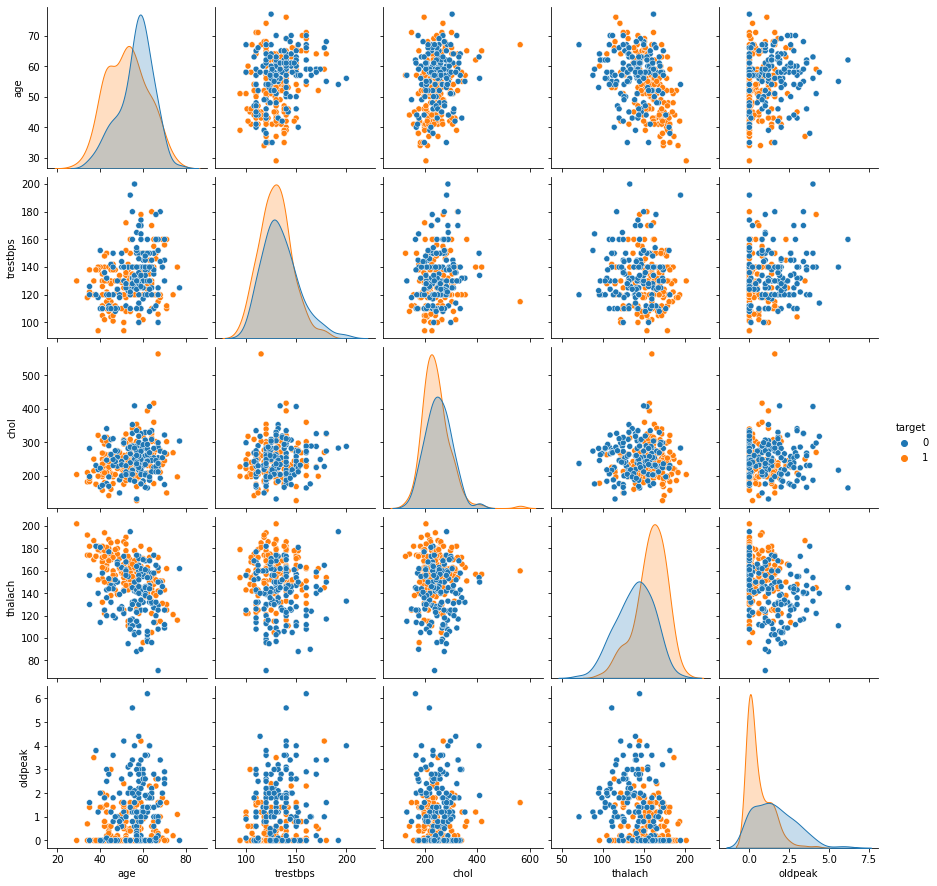

In [32]:
# Podemos realizar una visualización general 
# del conjunto de datos.
sns.pairplot(dataset[['age','trestbps','chol','thalach','oldpeak','target']],
             hue = 'target')

Podemos observar que la clase target se superpone entre sí. Las variables dependientes tienen poca o ninguna correlación entre sí, sin embargo, se distingue variaciones entre las clases, lo cual es una ventaja.

Los siguiente es dividir los datos en variables independientes y dependientes. 

In [33]:
X = dataset.iloc[:,:-1]
print(X.info())
y = dataset.iloc[:,-1]
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: target
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
None


Tenemos 13 características y 303 observaciones.

#### División de dataset en bloque de entrenamiento y prueba

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
random_state = 0)

#### Entrenamiento del modelo de regresión logistica

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Para evaluar el modelo, comparamos valores recién generados con los originales. En el caso de una tarea de clasificación, estos valores se comparan entre sí en una matriz de confusión. 

In [36]:
#Predecimos los resultados utilizando el conjunto de prueba.
y_pred = classifier.predict(X_test)
#Vamos a relizar la evaluación del modelo. 
from sklearn.metrics import confusion_matrix, accuracy_score
# Realizaremos la evaluación con los metodos confusion_matrix y accurancy_score.
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[24  9]
 [ 4 39]]


0.8289473684210527

Podemos identificar una exactitud del 82%.

También podemos verificar diferentes métricas utilizando classification_report, que nos muestra: Precision, recall, F1-score.

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



#### Recuperaremos el intercepto y coeficiente

In [38]:
#To retrieve the intercept:
print(classifier.intercept_)
#For retrieving the slope:
print(classifier.coef_)

[2.52764447]
[[ 2.67508804e-04 -1.68423511e+00  8.20272234e-01 -1.03806963e-02
  -5.11602254e-03 -4.39851131e-01  1.70902734e-01  2.26425190e-02
  -7.97173251e-01 -5.78388708e-01  2.31728891e-01 -7.77570166e-01
  -7.51876496e-01]]


In [39]:
classifier1=classifier
#Vamos a ordenar las características según sus coeficientes,
coeff_df = pd.DataFrame(classifier.coef_.T, X.columns,
columns=['Coefficient'])
coeff_df =coeff_df.sort_values(by = ['Coefficient'],ascending=False)
coeff_df

,Coefficient
cp,0.820272
slope,0.231729
restecg,0.170903
thalach,0.022643
age,0.000268
chol,-0.005116
trestbps,-0.010381
fbs,-0.439851
oldpeak,-0.578389
thal,-0.751876


Parece que el dolor torácico es uno de los principales síntomas de las enfermedades cardíacas, seguido por los resultados del electrocardiogramas en reposo.


Dado que el dolor torácico es una característica categórica, podemos hacer un gráfico de conteo e inferir el conteo de cada clase en las categorías donde se traza el dolor torácico.


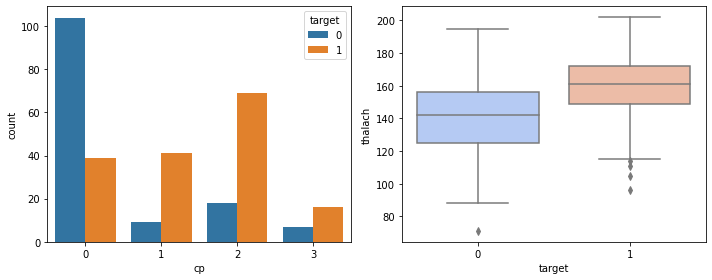

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
sns.countplot(x="cp", hue="target", data=dataset,ax=axes[0])
sns.boxplot(y='thalach',x='target',
data=dataset,palette="coolwarm",ax=axes[1])
fig.tight_layout()

Podemos de observar que para el dolor torácico $0$, tenemos menos conteos para enfermedades del corazón. A medida que la categorías de dolor torácico cambia a $1$, también aumenta el recuento de enfermedades cardíacas.

En el boxplot vemos la distribución de los resultados del electrocardiograma en reposo contra target. Podemos observar que los valores bajos de medición del electrocardiograma en reproso indican menor probabilidad de enfermedad cardiaca y viceversa.



#### Escalado de datos

El escaldo de de datos hace que el rango de variables se vuelva uniforme. 


Primero estudiemos su propagación usando  la función describe().

In [41]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Verifique las columnas media, desviación estándar, mínima y máxima de las características continuas como edad, trestbps: Presión arterial en reposo de la persona, chol: Colesterol de la persona, thalach: La frecuencia cardíaca máxima alcanzada por la persona y oldpeak: Depresión ST inducida por el ejercicio en relación con el reposo. Todos estos valores tienen diferencias considerables en sus rangos, esto puede afectar el entrenamiento de los modelos. Para producir los datos en rangos similares ejecutaremos un escalado. 

Utilizaremos la libreria preprocessing de Sklearn, que tiene varias clases. Utilizaremos StandardScaler que resta todas las observaciones con sus medias y luego las divide con la desviación estándar.

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_norm,columns=dataset.iloc[:,0:-1].columns)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,5.825923e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.319077e-17,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,-5.562565e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.146832e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-9.828955e-17,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-3.664102e-19,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,2.652810e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-5.203025e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-5.203025e-16,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,-3.140136e-16,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


Ahora los valores de media, Std, mínimo y máximo han cambiado. Ahora, estan escalados y se transforman en una distribución uniforme. 

Además podemos producir los datos para cada función en un rango idéntico (es decir,  entre  0 y 1) usando la clase MinMaxScaler.

In [43]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_minmax = sc.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax,columns=dataset.iloc[:,0:-1].columns)
X_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,0.528465,0.189210,0.0,0.385417,0.541667,0.666667,1.0
sex,303.0,0.683168,0.466011,0.0,0.000000,1.000000,1.000000,1.0
cp,303.0,0.322332,0.344017,0.0,0.000000,0.333333,0.666667,1.0
trestbps,303.0,0.354941,0.165454,0.0,0.245283,0.339623,0.433962,1.0
chol,303.0,0.274575,0.118335,0.0,0.194064,0.260274,0.339041,1.0
fbs,303.0,0.148515,0.356198,0.0,0.000000,0.000000,0.000000,1.0
restecg,303.0,0.264026,0.262930,0.0,0.000000,0.500000,0.500000,1.0
thalach,303.0,0.600358,0.174849,0.0,0.477099,0.625954,0.725191,1.0
exang,303.0,0.326733,0.469794,0.0,0.000000,0.000000,1.000000,1.0
oldpeak,303.0,0.167678,0.187270,0.0,0.000000,0.129032,0.258065,1.0


Ahora vamos a entrenar el modelo con los datos escalados

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size =
0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Evaluaremos el modelo para confirmar si hemos mejorado el modelo

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



Al escalar los datos obtenemos una mejora del 2% con respecto a los datos sin escalar. Esto muestra que la regresión logística no es demasiado sensible al escalado de datos, a diferencia de ciertos algoritmos como las redes neuronales artificiales, que son muy sensibles al escaldo de datos.

In [46]:
coeff_df = pd.DataFrame(classifier.coef_.T, X.columns, columns=['Coefficient'])  

coeff_df  =coeff_df.sort_values(by=['Coefficient'],ascending=False)
coeff_df

,Coefficient
cp,0.784649
thalach,0.499985
slope,0.133061
restecg,0.090923
age,-0.076538
fbs,-0.134333
trestbps,-0.197367
chol,-0.240893
thal,-0.452140
exang,-0.475652


#### Predicción de nuevos resultados

Podemos predecir nuevos resultados utilizando predict. 

In [47]:
#tomemos un registo desde el dataset
dataset.iloc[1,:]

age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64

In [48]:
dataset.iloc[1,:-1].values


array([ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
         3.5,   0. ,   0. ,   2. ])

In [49]:
#Tomaremos el modelos antes de escalar.
new_data=dataset.iloc[1,:-1].values
classifier1.predict(sc.transform([new_data]))

/Users/galanve/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/galanve/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

El modelo predice que las observaciones pertenecen a la clase $1$ (es decir, tener una enfermedad cardíaca). El modelo tambien piede proporcionar la probabilidad de que la observación pertenezca a la clase predicha con predict_proba().

In [50]:
classifier1.predict_proba(sc.transform([new_data]))

/Users/galanve/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/galanve/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.34005061, 0.65994939]])

El resultado muestra que tiene un 34% de posibilidades de estar en la clase 0 y un 65.9% de posibilidades de estar en la clase 1. La posibilidad de caer en la clase 1 es superior al 50%; por lo tanto, la observación ha sido asignada a la clase 1.

### Predicción de cáncer de mama usando regresión logistica

El cáncer de mama es el más común y maligno entre las mujeres, representa 1 de cada 3 cánceres diagnosticados entre mujeres en los Estados Unidos y es la primera causa de muertes por cáncer entre las mujeres. El cáncer de mama se produce como resultado del crecimiento anormal de células en el tejido mamario, lo que comúnmente se conoce como tumor. Un tumor no significa cancer: Los tumores pueden ser benignos (no cancerosos) o malignos (cancerosos). Pruebas como resonacia magnética, la mastografía y biopsia se realizan comúnmente para diagnosticar el cáncer de mama.

Utilizaremos el dataset Breast Cancer Wisconsin (Diagnostic), creado por el Dr. William H. Wolberg médico del Hospital de la Universidad de Wisconsin, utilizó muestras de fluidos, tomadas de pacientes con masas mamarias sólidas y un programa llamadao Xcyt, que es capaz de realizar el análisis de características citológicas basadas en un escaneo digital. El programa utiliza un algoritmo de ajustes de curvas para calcular díez características, luego calcula el valor medio, el valor extremo y el error estándar de cada característica de la imagen.

que consiste de características que fueron calculadas desde imagenes digitalizadas de un aspiración con aguja fina de una masa mamaria. Dichos rasgos describen las características de los núcleos celulares que se encuentran en la imagen.  

Este consiste de 569 datos, de los cuales 212 son malignos y 357 son benignos.

Las características son:
1. Numero ID
2. Diagnostico (M=maligno, B=benigno)
3. Radio (media de la distancia den centro a los puntos del perímetro)
4. Textura (desviación estándar de los valores de la escala de grises)
5. Perímetro
6. Área
7. Suavidas (variación local en longitudes de radio)
8. Espacio compacto (perimetro^2/area-1.0)
9. Concavidad (severidad de las porciones cóncavas del contorno)
10. Puntos cóncavos (número de porciones cóncavas del controrno)
11. Simetría
12. Dimensión fractal 

Mean: media
Se: error estandar
Worst: Media de los tres valores más grandes


Objetivo
Es clasificar si el cáncer de mama es benigno o maligno.

In [51]:
dataset = pd.read_csv('../Datos/Breast_Cancer.csv')
dataset.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [52]:
dataset.shape

(569, 33)

In [53]:

toggle_cell_code("Display3")
dataset['diagnosis'].value_counts()

Codigo

B    357
M    212
Name: diagnosis, dtype: int64

In [54]:
#Eliminamos las columnas que no nos sirven
toggle_cell_code("Display4")
dataset = dataset.drop(['id','Unnamed: 32'],axis=1)

Codigo

In [55]:
#Separamos las caraterísticas en variable independiente y dpendiente
toggle_cell_code("Display5")
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

Codigo

#### Escalado de datos
Utilizaremos 'StandardScaler' para escalar los datos.


In [56]:
toggle_cell_code("Display6")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

Codigo

In [57]:
#dividimos los datos en un conjunto de entrenamiento y de prueba
toggle_cell_code("Display7")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)



Codigo

In [58]:
#Evaluación de modelo

toggle_cell_code("Display8")
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

Codigo

[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Podemos observar que la tasa de exactitud es del 96%. Además podemos identificar las carácteristicas informativas con un mayor impacto en la predicción de la categoría del tumor recuperando el coeficiente.

In [59]:

toggle_cell_code("Display9")
coeff_df = pd.DataFrame(classifier.coef_.T, X.columns, columns=['Coefficient'])  

coeff_df  =coeff_df.sort_values(by=['Coefficient'],ascending=False)
coeff_df

Codigo

,Coefficient
radius_se,1.376258
texture_worst,1.058625
area_se,0.994695
concave points_worst,0.987129
radius_worst,0.922528
area_worst,0.909691
concavity_worst,0.870952
concave points_mean,0.843549
perimeter_se,0.812926
perimeter_worst,0.758439


Podemos identificccar que las caraterísticas 'radius_se' y 'texture_worst' tienen una contribución iportante para determinar si los tumores de mama son malignos. El radio determina el tamaño de la celda, mientras que la textura es el contraste de las imágenes de la celda. 

Codigo

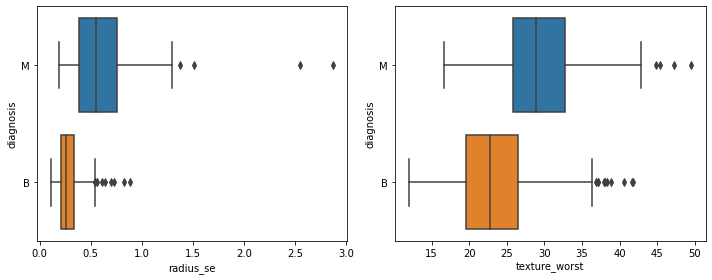

In [60]:
toggle_cell_code("Display10")
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
sns.boxplot(x="radius_se", y="diagnosis", data=dataset,ax=axes[0])
sns.boxplot(x='texture_worst',y='diagnosis',
            data=dataset,ax=axes[1])
fig.tight_layout()

Podemos visualizar la propagación de las características 'radio_se' y 'texture_worst' para las categorias maligno y benigno. Las celulas malignas son en general más grandes que las células beningnas.
